In [1]:
!pip install pyxlsb
!pip install pandas --upgrade

In [2]:
import pandas as pd
import pyxlsb
import numpy as np

In [4]:
df = pd.read_excel('stc TV Data Set_T1.xlsb', engine='pyxlsb')

In [5]:
dataframe=df.copy()

In [6]:
dataframe.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [7]:
dataframe = dataframe.drop(columns=['Column1'])         # dropping the index column
dataframe['program_name'] = dataframe['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
dataframe['date_'] = pd.to_datetime(dataframe['date_'], unit='D', origin='1899-12-30')
dataframe[['duration_seconds', 'season','episode','series_title','hd']] = dataframe[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

In [91]:
dataframe.head(5)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [217]:
program_class_df = df.groupby('original_name')['program_class'].unique().apply(lambda x: ', '.join(x)).reset_index()

program_genre_df.head(20)

,original_name,program_class
0,#FollowFriday,MOVIE
1,10 Days in a Madhouse,MOVIE
2,100 treets,MOVIE
3,101 Dalmatians,MOVIE
4,102 Dalmatians,MOVIE
5,11.6,MOVIE
6,12 Monkeys,SERIES/EPISODES
7,12 Rounds,MOVIE
8,12 Rounds : Reloaded,MOVIE
9,127 Hours,MOVIE


In [9]:
group=dataframe.copy()

In [134]:
movie_durations = (df.groupby('original_name')['duration_seconds'].sum()/3600).sort_values(ascending=False)
num_of_watch=df.groupby('original_name')['duration_seconds'].count().sort_values(ascending=False)


program_genre_count=df.groupby('program_genre')['original_name'].count().sort_values(ascending=False)
movie_series=df.groupby('program_class')['program_class'].count()

movie_durations = movie_durations.reset_index(name='hour')
num_of_watch = num_of_watch.reset_index(name="user")
movie_series=movie_series.reset_index(name='count')
program_genre_count=program_genre_count.reset_index(name='count')



In [135]:
hd_counts_by_name = df.groupby(['original_name', 'hd'])
hd_counts_by_name = df.groupby(['original_name', 'hd']).size().unstack(fill_value=0).rename_axis(None, axis=1)
hd_counts_by_name = hd_counts_by_name.reset_index()
hd_counts_by_name = hd_counts_by_name.rename(columns={0: 'SD', 1: 'HD'})
hd_counts_by_name.sort_values(by=['HD'], ascending=False, inplace=True)
hd_counts_by_name.reset_index(drop=True, inplace=True)

In [221]:
merged_df = pd.merge(movie_durations, num_of_watch, on='original_name')
merged_df = pd.merge(merged_df, hd_counts_by_name, on='original_name')
merged_df = pd.merge(merged_df, program_class_df, on='original_name')



merged_df.sort_values(by=['HD'], ascending=False, inplace=True)
merged_df.head(10)

,original_name,hour,user,SD,HD,program_class
21,The Boss Baby,2961.350833,24047,422,23625,MOVIE
0,Friends,19873.483056,32997,13842,19155,SERIES/EPISODES
24,Marcus Level (T),2715.972778,13804,0,13804,SERIES/EPISODES
52,Trolls,1601.023056,13793,184,13609,MOVIE
217,The Adventures of Petey and Friends,296.845833,9612,102,9510,MOVIE
50,Jelly Jamm (T),1616.246111,8261,0,8261,SERIES/EPISODES
45,Moana,1706.176944,8081,560,7521,MOVIE
127,Baywatch,548.995556,7436,104,7332,MOVIE
135,The Mermaid Princess,503.111111,7525,416,7109,MOVIE
94,Ferdinand,714.223056,6817,6,6811,MOVIE


In [141]:
import plotly.express as px
top_5_movies_by_duration = movie_durations.head(5)
top_5_movies_by_watching=num_of_watch.head(5)

# Create the pie chart using Plotly
fig1=px.pie(movie_series, values='count', names='program_class', title='Movie-Series')
# Show the plot
fig1.show()

In [145]:
fig2 = px.pie(merged_df.head(5), values='hour', names='original_name', title='Top 5 movies by duration')
fig2.show()

In [148]:
merged_df.sort_values(by=['user'], ascending=False, inplace=True)
fig2 = px.pie(merged_df.head(5), values='user', names='original_name', title='Top 5 movies by users')
fig2.show()

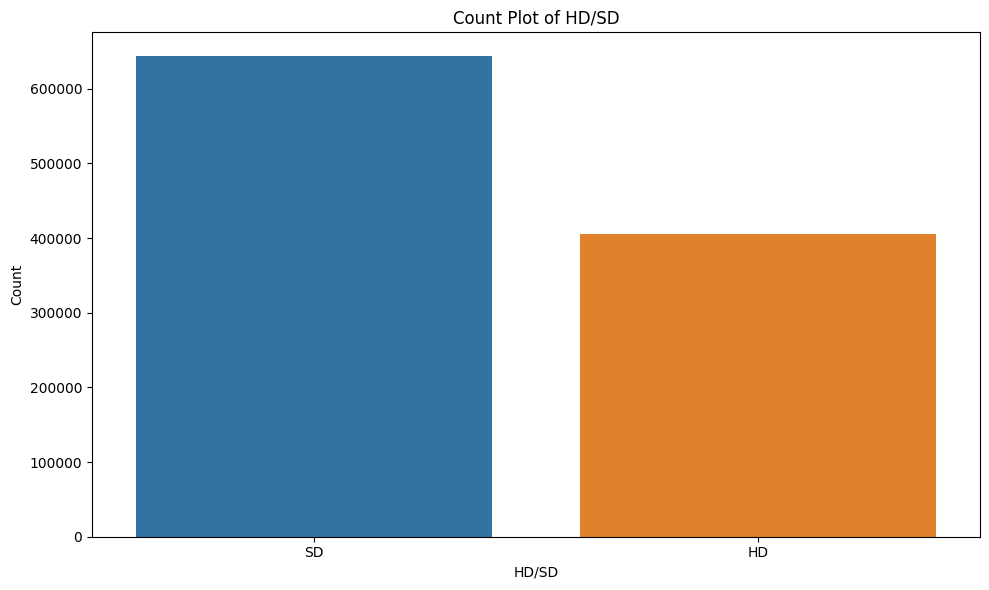

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
hd_label_mapping = {0: 'SD', 1: 'HD'}

# Replace hd values with corresponding labels
dataframe['hd'] = dataframe['hd'].map(hd_label_mapping)

# Create a count plot of 'hd' with custom labels
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='hd')
plt.xlabel('HD/SD')
plt.ylabel('Count')
plt.title('Count Plot of HD/SD')
plt.tight_layout()
plt.show()

In [236]:
program_class_counts = merged_df.groupby('program_class')[['HD', 'SD']].sum()
print(program_class_counts)

                     HD      SD
program_class                  
MOVIE            331746  156655
SERIES/EPISODES   73290  486884


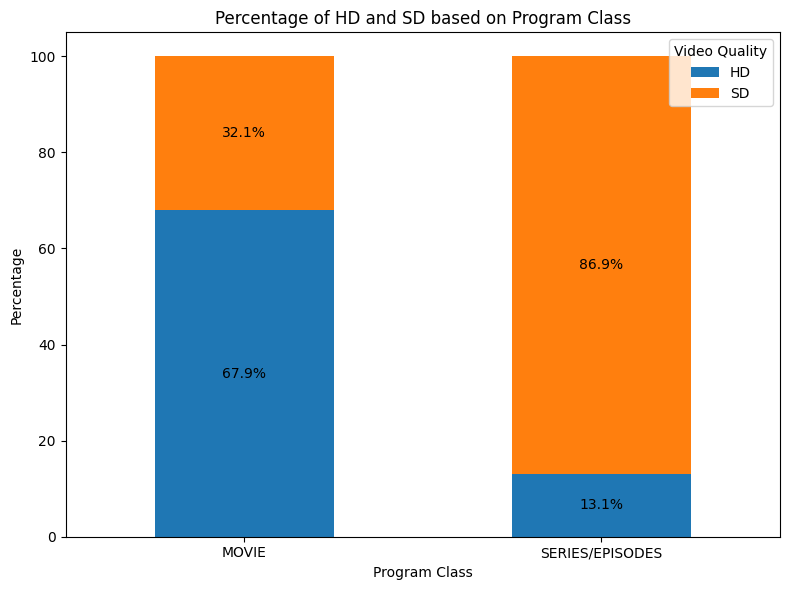

In [248]:
total_counts = program_class_counts.sum(axis=1)
program_class_percentages = program_class_counts.div(total_counts, axis=0) * 100

# Create a bar plot
ax = program_class_percentages.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Program Class')
plt.ylabel('Percentage')
plt.title('Percentage of HD and SD based on Program Class')
plt.xticks(rotation=0)
plt.legend(title='Video Quality', loc='upper right', labels=['HD', 'SD'])

# Add percentage labels to the bars
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()